# Introducción a Keras

## ¿Qué es Keras?

<figure>
    <center>
        <img src = "Figures/keras.png" alt = "Keras" style = "width:50%">
        <figcaption>Tensorflow y Keras.<br>Imagen tomada de https://www.luisllamas.es/machine-learning-con-tensorflow-y-keras-en-python/.</figcaption>
    </center>
</figure>

Keras es una biblioteca de redes neuronales de alto nivel escrita en Python que facilita la creación, entrenamiento y evaluación de modelos de redes neuronales de manera rápida y sencilla.

Aspectos clave:

- Simplicidad y Facilidad de Uso:
Keras está diseñado para ser fácil de entender y utilizar, lo que lo hace ideal para principiantes y expertos por igual. Su sintaxis simple y consistente permite a los desarrolladores crear y experimentar con modelos de redes neuronales de manera eficiente.

- Modularidad y Flexibilidad:
Keras proporciona una API modular que permite construir modelos de redes neuronales de manera modular y flexible. Puedes crear modelos secuenciales, modelos funcionales y modelos personalizados para adaptarse a una variedad de tareas y aplicaciones.

- Compatibilidad con Múltiples Backends:
Keras proporciona una interfaz de alto nivel que es independiente del backend de cálculo. Actualmente, Keras es compatible con varios backends, incluyendo TensorFlow, Microsoft Cognitive Toolkit (CNTK) y Theano, lo que te permite cambiar fácilmente entre diferentes backends según tus necesidades.

- Amplia Comunidad y Soporte:
Keras cuenta con una gran comunidad de usuarios y desarrolladores que comparten recursos, tutoriales y soluciones a través de foros en línea, grupos de discusión y redes sociales. Esto proporciona un sólido soporte y una fuente de conocimiento para aquellos que están aprendiendo y trabajando con Keras.

- Integración con TensorFlow:
Desde TensorFlow 2.0, Keras se ha convertido en la API de alto nivel predeterminada para TensorFlow, lo que significa que puedes importar Keras directamente desde TensorFlow y aprovechar toda su funcionalidad sin necesidad de instalar Keras por separado.

## Perceptrón multicapa (MLP)

Es una red neuronal artificial compuesta por múltiples unidades (perceptrón) dispuestas en un arreglo lineal que forma capas.

Se trata de una red multicapa alimentada hacia adelante.

Se emplea para resolver problemas de regresión o clasificación con un entrenamiento supervizado.

<figure>
    <center>
        <img src = "Figures/mlp.png" alt = "MLP" style = "width:100%">
        <figcaption>Perceptrón multicapa.<br>Imagen tomada del libro Dive into deep learning de Zhang et al., 2021.</figcaption>
    </center>
</figure>



En este tutorial, implementaremos un MLP usando Keras para resolver el problema de clasificación de imágenes del conjunto Fashion-MNIST.

## Fashion-MNIST

Es una base de datos de imágenes de artículos de Zalando. Surgió como un reemplazo al tradicional conjunto de dígitos de MNIST.

<figure>
    <center>
        <img src = "Figures/fmnist_sample.png" alt = "Fashion-MNIST" style = "width:100%">
        <figcaption>Ejemplos de imágenes contenidas en Fashion-MNIST.<br>Imagen tomada https://docs.ultralytics.com/es/datasets/classify/fashion-mnist/#dataset-structure.</figcaption>
    </center>
</figure>

#### La partición de este conjunto de datos es la siguiente:

1. Conjunto de entrenamiento: contiene 60,000 imágenes.
2. Conjunto de pruebas: contiene 10,000.

#### Las características de este conjunto de datos son las siguientes:

* El conjunto de datos contiene imágenes en escala de grises con una dimensión de $28x28$ píxeles.
* La intensidad de los píxeles es un valor entero entre 0 y 255.
* Fashion-MNIST se utiliza ampliamente para entrenar y probar algoritmos de aprendizaje automático y aprendizaje profundo, especialmente para tareas de clasificación de imágenes.

#### Las etiquetas son las siguientes:

1. Camiseta/top
2. Pantalones
3. Jersey
4. Vestido
5. Abrigo
6. Sandalia
7. Camisa
8. Zapatilla
9. Bolsa
10. Botín

# ¡Comencemos a programar!

## Librerías a utilizar

Primero importamos las librerías necesarias, entre ellas, `tensorflow`.

Como mencionamos anteriormente, Keras está incluido dentro de tensorflow, por lo que no es necesario instalar Keras por separado si ya tenemos tensorflow instalado.

En Google Colab, no tenemos que preocuparnos por esto, ya que todas estas librerías ya se encuentran precargadas, no es necesario instalar nada adicional.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from keras import initializers
from keras.optimizers import Adam
from keras.utils import plot_model

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-05-31 17:09:04.692051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Cargamos el conjunto de datos de Fashion-MNIST

Keras incluye una colección de bases de datos, entre ellas, podemos encontrar la de Fashion-MNIST, por lo que tampoco es necesario descargarla por separado.

Como mencionamos anteriormente, este conjunto consiste en 60,000 imágenes para el entrenamiento y 10,000 para prueba.

No es necesario realizar esta partición, simplemente asignamos los datos a la variable correspondiente.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


## Preprocesamiento de las imágenes

Una vez cargado el conjunto de datos, realizamos unas simples, pero importantes tareas de preprocesamiento.

* Primero, debemos normalizar nuestros datos para que estén en un rango entre 0 y 1. Esto lo logramos dividiendo las imágenes entre 255, que es el valor máximo de intensidad que pueden tomar los píxeles.
* Otro paso fundamental consiste en amplanar las imágenes. Esto se debe a las características del MLP, ya que la capa de entrada debe recibir los datos en forma de un vector (en el caso de un solo ejemplo). Para esto, redimensionamos las imágenes de $28x28$ a 784 ($28x28 = 784$ píxeles).
* Finalmente, debemos representar nuestras etiquetas con one-hot encoding.

#### ¿Por qué aplanar la imagen?

<figure>
    <center>
        <img src = "Figures/flatten_img.png" alt = "flatten image" style = "width:75%">
        <figcaption>Aplanamiento de la imagen para la capa de entrada.<br>Imagen tomada https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480.</figcaption>
    </center>
</figure>

In [4]:
X = x_train / 255
X = X.reshape((X.shape[0], 784))
y = tf.keras.utils.to_categorical(y_train, 10)

X_test = x_test / 255
X_test = x_test.reshape((x_test.shape[0], 784))
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Subconjunto de validación

A pesar de que nuestros datos ya se encuentran particionados, todavía necesitamos un conjunto de validación.

Este lo obtenemos a partir del conjunto de entrenamiento.

En este caso, reservamos el 25\% para el conjunto de validación.

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 123)

## Construcción del modelo con Keras

Keras, al ser un framework de alto nivel, nos permite abstraer la implementación de una red neuronal y nos permite diseñar un modelo complejo con unas cuantas líneas de código de manera intuitiva y sencilla.

#### Primero

Necesitamos inicializar nuestro modelo como un modelo secuencial con la línea de código:

model = `Sequential()`

Hasta este punto, hemos inicializado nuestro modelo, pero todavía no tiene capas.

Vamos a agregarlas.

Primero definimos la forma que tendrán las entradas a nuestro modelo con el siguiente código:

`model.add(Input(shape = (784,)))`

En este caso, la forma de la entrada es una imagen aplanada que consiste en un vector con 784 píxeles.

Keras tiene diferentes tipos de capas. En este caso, como estamos implementando un MLP, vamos a requerir únicamente la capa `Dense`.

Para agregar una capa usamos la siguiente sintaxis:

```
model.add(Dense(
    units,
    kernel_initializer = initializers.HeNormal(),
    activation = "relu"))
````

Donde:

* `units` es el número de neuronas que va a tener nuestra capa.
* `kernel_initializer` es la función de inicialización de los pesos para esa capa.
* `activation` es la función de activación que tendrá cada neurona en dicha capa.

Recordemos que lo recomendado es usar ReLU como función de activación para capas ocultas.

Para la capa de salida, necesitamos Softmax, ya que nuestro problema tiene múltiples clases.

Así, nuestro modelo quedaría de la siguiente forma:

In [6]:
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(
    units = 128,
    kernel_initializer = initializers.HeNormal(),
    activation = "relu"))
model.add(Dense(
    units = 64,
    kernel_initializer = initializers.HeNormal(),
    activation = "relu"))
model.add(Dense(
    units = 10,
    kernel_initializer = initializers.GlorotNormal(),
    activation = "softmax"))

Podemos obtener la cantidad de parámetros que tiene nuestro modelo usando el método `summary()`.

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Para observar más detalles de nuestro modelo, podemos usar la función `plot_model`.

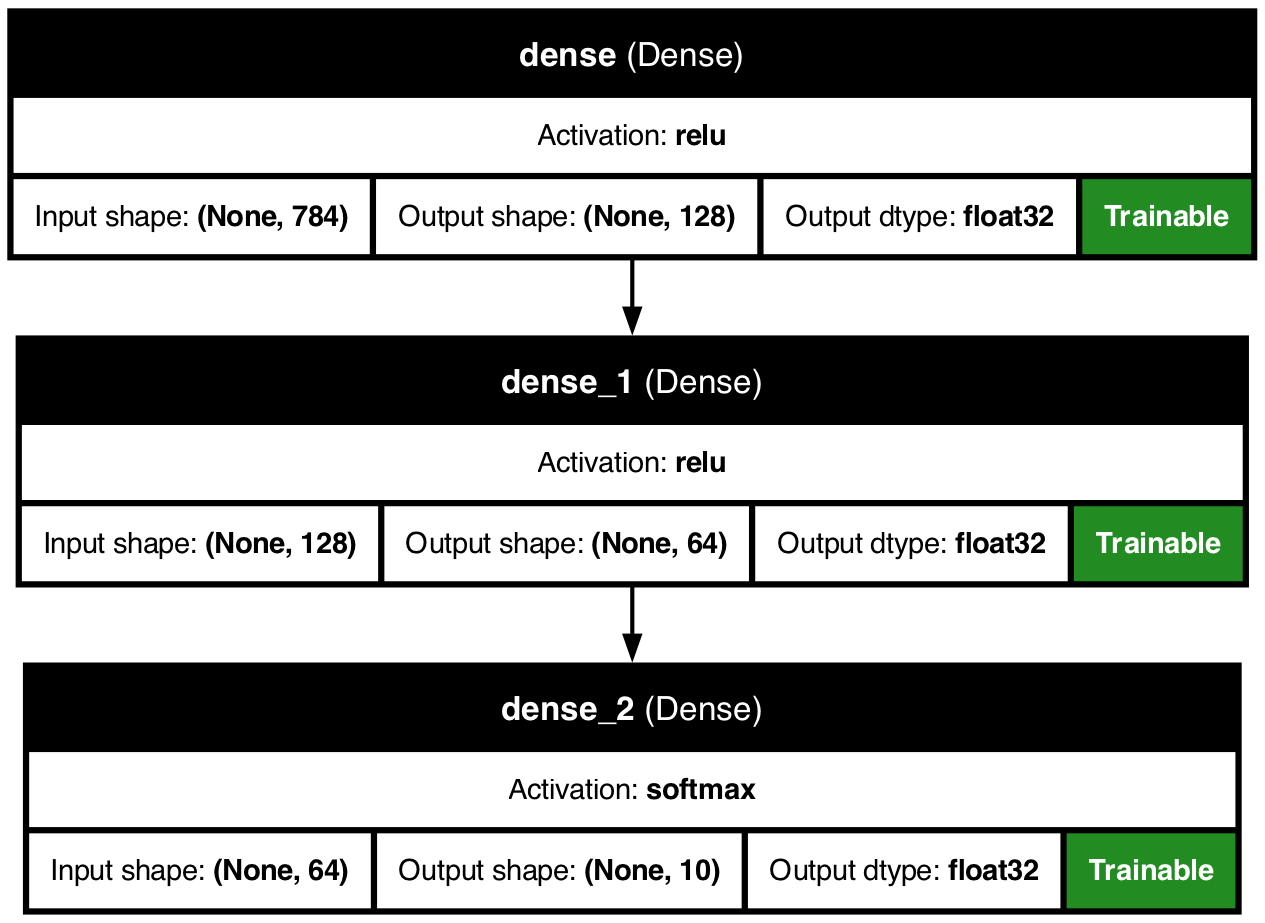

In [8]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=False,
    dpi=150,
    show_layer_activations=True,
    show_trainable=True,
)

## Compilación del modelo

Después de crear el modelo, es importante realizar la compilación del mismo para asegurarnos de que no existen errores.

Este paso también nos permite establecer el optimizador que emplearemos para ajustar los parámetros, la función de pérdida y la métrica de evaluación del modelo.

#### Para el optimizador

Podemos definir algunos parámetros ya vistos en el curso, como:

* Tasa de aprendizaje, $\alpha$.
* Coeficiente para momento, $\beta_1$.
* Coeficiente para la parte de RMSProp, $\beta_2$.
* Hiperparámetro para evitar la división entre cero, $\epsilon$.
* Decaimiento de pesos (regularización L2).

In [9]:
optimizer = Adam(
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    weight_decay = 0.01)

Una vez definidos los hiperparámetros del optimizador, compilamos el modelo.

In [10]:
model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

## Entrenamiento del modelo

Una vez compilado el modelo, podemos pasar al entrenamiento.

Tenemos que pasar el conjunto de entrenamiento, así como las etiquetas para estas imágenes.

Opcionalmente, pasamos el conjunto de validación. Una alternativa para elegir un conjunto de validación, es usar el argumento `validation_split = 0.2`.

En esta parte también definimos el tamaño del lote y el número de épocas.

In [11]:
training = model.fit(X_train, y_train,
                     batch_size = 32,
                     validation_data = (X_val, y_val),
                     epochs = 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7631 - loss: 0.6801 - val_accuracy: 0.8485 - val_loss: 0.4086
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8592 - loss: 0.3848 - val_accuracy: 0.8627 - val_loss: 0.3740
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8760 - loss: 0.3409 - val_accuracy: 0.8721 - val_loss: 0.3571
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8795 - loss: 0.3237 - val_accuracy: 0.8748 - val_loss: 0.3490
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8870 - loss: 0.2972 - val_accuracy: 0.8756 - val_loss: 0.3394
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8919 - loss: 0.2908 - val_accuracy: 0.8677 - val_loss: 0.3762
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8995 - loss: 0.2662 - val_accuracy: 0.8826 - val_loss: 0.3416
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8988 - loss: 0.2700 - 

### Visualizando el desempeño del modelo

Al entrenar el modelo, guardamos la información en la variable `training`. Esto nos permite recuperar la información del historial del entrenamiento y graficarlo para observar el desempeño del modelo.

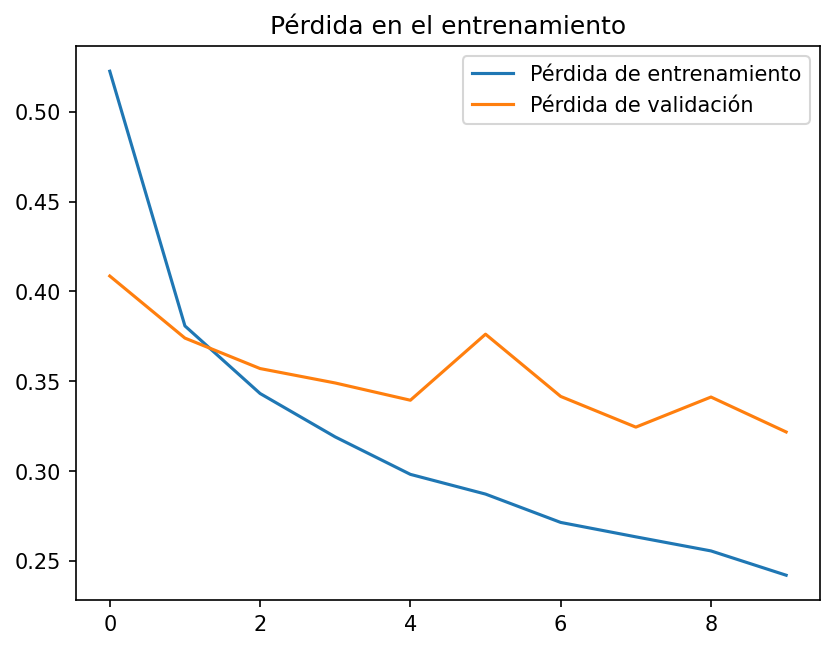

In [12]:
plt.plot(training.history["loss"], label = "Pérdida de entrenamiento")
plt.plot(training.history["val_loss"], label = "Pérdida de validación")
plt.legend()
plt.title("Pérdida en el entrenamiento")
plt.show()

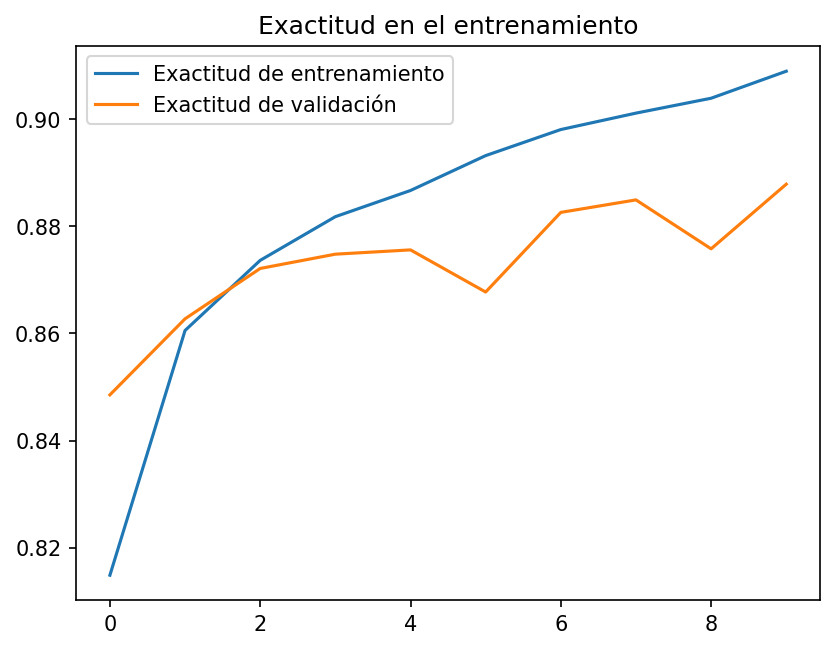

In [13]:
plt.plot(training.history["accuracy"], label = "Exactitud de entrenamiento")
plt.plot(training.history["val_accuracy"], label = "Exactitud de validación")
plt.legend()
plt.title("Exactitud en el entrenamiento")
plt.show()

## Haciendo predicciones

Una vez entrenado el modelo, podemos usarlo para hacer predicciones.

Para esto, simplemente usamos el método `predict` y le pasamos los datos y etiquetas de prueba.

In [14]:
y_pred = model.predict(X_test, verbose = 0)

### Una muestra de los resultados

Podemos observar los resultados de una forma más gráfica.

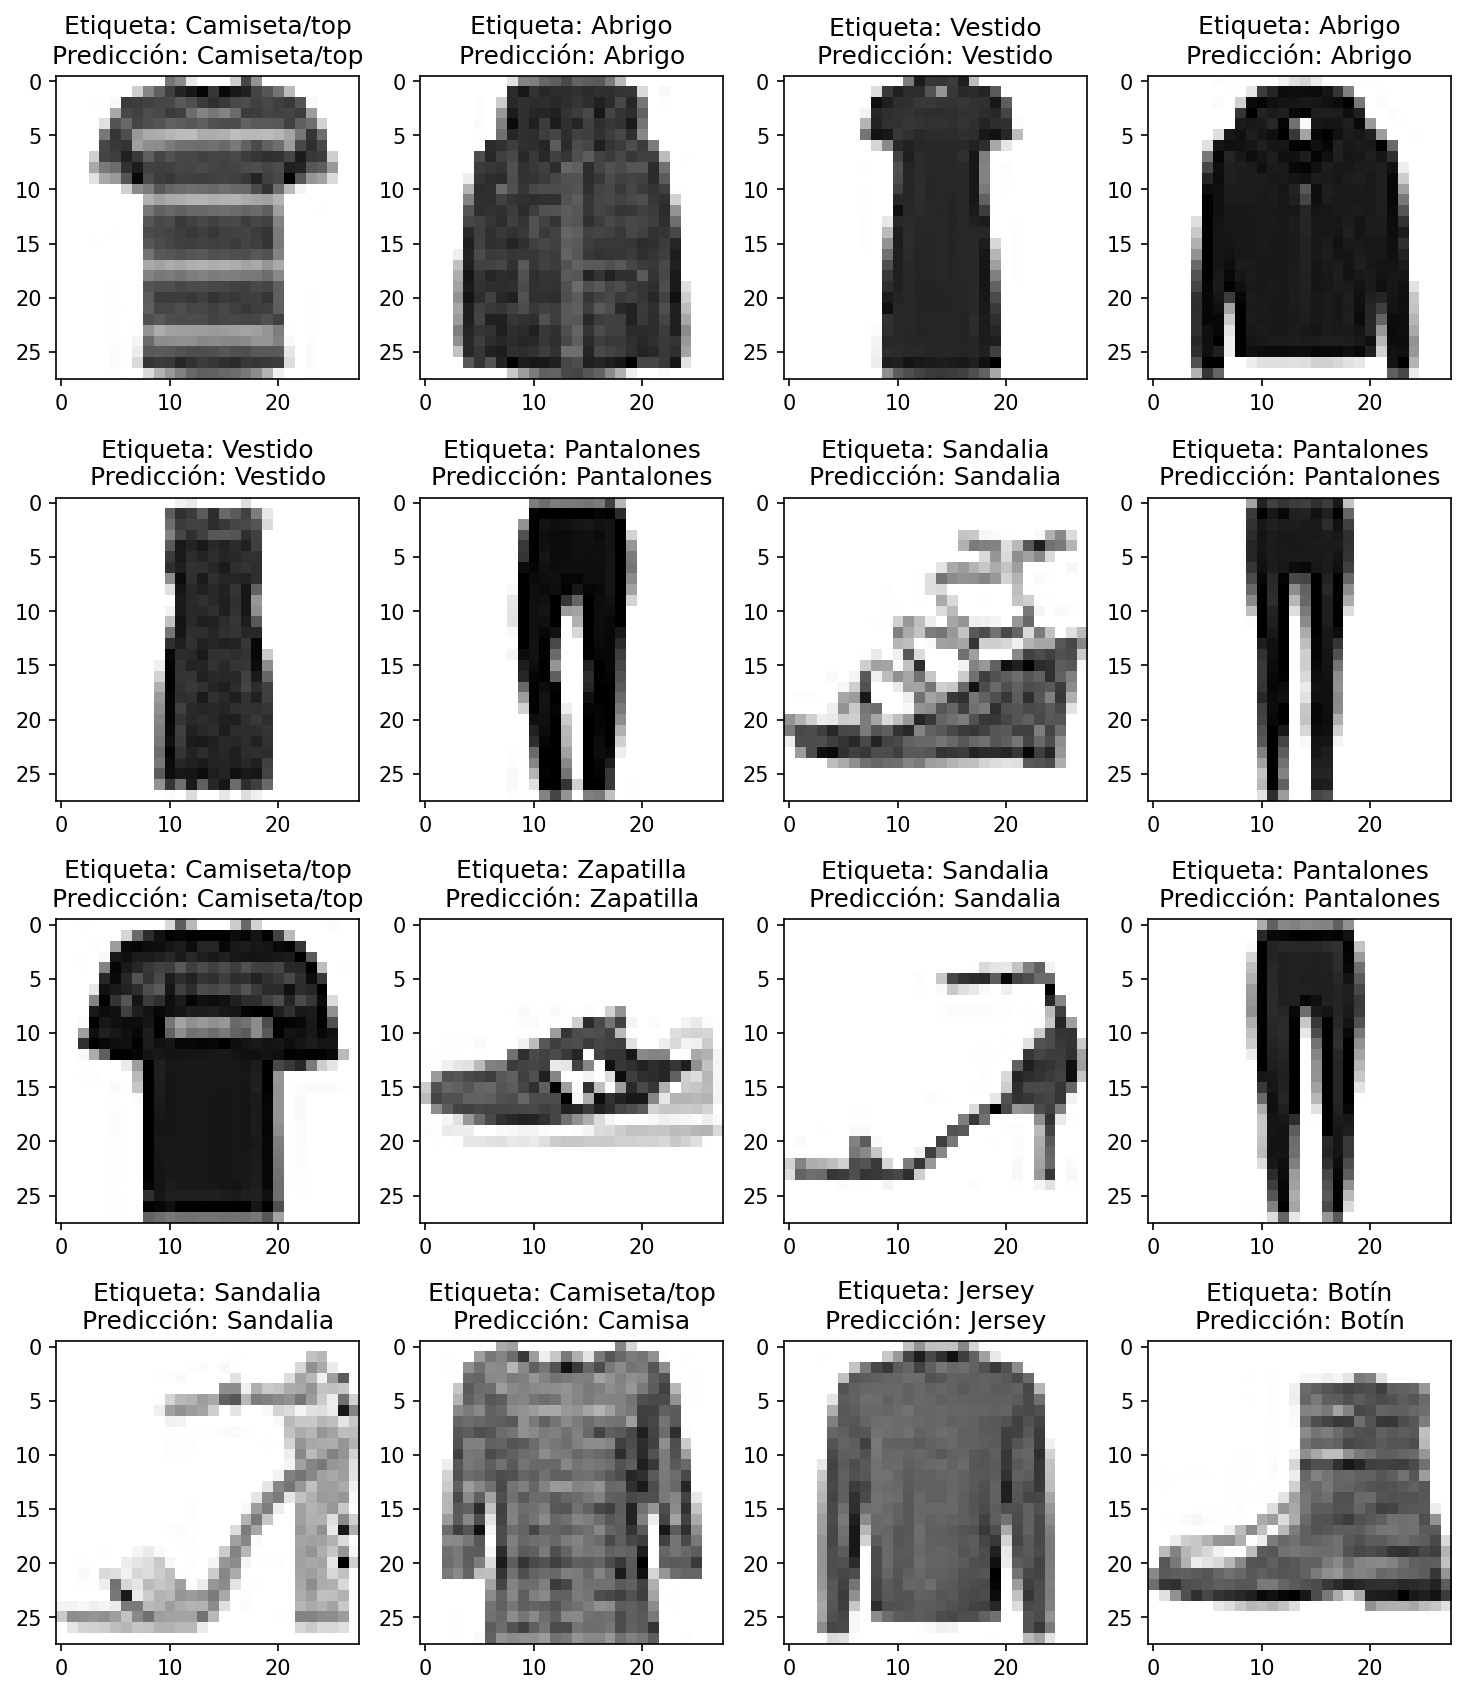

In [15]:
class_names = ["Camiseta/top", "Pantalones", "Jersey", "Vestido", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolsa", "Botín"]

test_imgs = X_test.reshape(X_test.shape[0], 28, 28)
sample_ids = np.random.choice(X_test.shape[0], size = 16, replace = False)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_imgs[sample_ids[i]], cmap = 'binary')
    ax.set(title = f"Etiqueta: {class_names[y_test[sample_ids[i]].argmax()]}\nPredicción: {class_names[y_pred[sample_ids[i]].argmax()]}");

## Evaluando el modelo

Finalmente, evaluamos el modelo con el mismo conjunto de prueba usando el método `predict`.

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 61.7517


[63.590187072753906, 0.853600025177002]